In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt



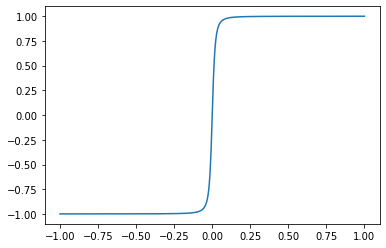

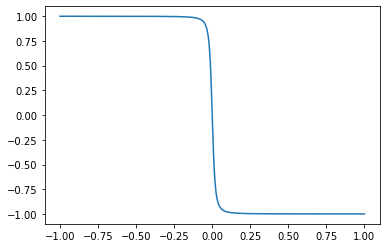

In [2]:
## This cell contains Q5.1/Q5.2

# Helper function that identifies and returns the ground and excited states
def find_ground_excited_states(H):
    eigvals, eigvecs = la.eig(H)
    eig_dict[PD] = (eigvals, eigvecs)

    # find index of appropriate eigenvalue
    ground_index = np.argmin(eigvals)
    excited_index = np.argmax(eigvals) 
    
    # use index to generate appropriate states
    ground = eigvecs[:,ground_index].reshape(eigvecs.shape[0],1)
    excited = eigvecs[:,excited_index].reshape(eigvecs.shape[0],1)
    
    return ground, excited

# The following script calculates the ICHA Hamiltonian for a single cell and plots the ground 
# and excited state eigenvectors as they are swept from -1 to 1    
Ek = 1
gamma = 0.01*Ek
eig_dict = {}
delta = 0.001
PD_list = np.arange(-1,1+delta,delta)
P_ground_list = np.zeros(PD_list.shape[0])
P_excited_list = np.zeros(PD_list.shape[0])

for i in range(0, PD_list.shape[0]):
    PD = PD_list[i]
    H = np.array([[-0.5*Ek*PD, -gamma], [-gamma, 0.5*Ek*PD]])
    
    ground, excited = find_ground_excited_states(H)
    
    P_ground_list[i] = abs(ground[0])**2 - abs(ground[1])**2
    P_excited_list[i] = abs(excited[0])**2 - abs(excited[1])**2

plt.plot(PD_list, P_ground_list)
plt.show()

plt.plot(PD_list, P_excited_list)
plt.show()

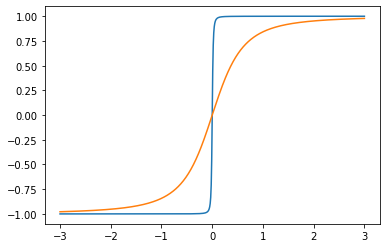

In [3]:
## This cell contains Q5.3

# The following script calculates the ICHA Hamiltonian for 2 cells and plots the ground 
# and excited state eigenvectors as they are swept from -1 to 1  
Ek = 1
gamma = 0.01*Ek
eig_dict1 = {}
eig_dict2 = {}
delta = 0.01
PD_list = np.arange(-3,3+delta,delta)
P_ground_list1 = np.zeros(PD_list.shape[0])
P_excited_list1 = np.zeros(PD_list.shape[0])

P_ground_list2 = np.zeros(PD_list.shape[0])
P_excited_list2 = np.zeros(PD_list.shape[0])

for i in range(0, PD_list.shape[0]):
    PD = PD_list[i]
   
    H1 = np.array([[-0.5*(Ek*PD), -gamma], [-gamma, 0.5*(Ek*PD)]])
    ground, excited = find_ground_excited_states(H1)
    
    P_ground_list1[i] = abs(ground[0])**2 - abs(ground[1])**2
    
    H2_ground = np.array([[-0.5*((Ek/2**5)*PD), -gamma], [-gamma, 0.5*((Ek/2**5)*PD)]])
    ground, excited = find_ground_excited_states(H2_ground)
    
    P_ground_list2[i] = abs(ground[0])**2 - abs(ground[1])**2

plt.plot(PD_list, P_ground_list1)
plt.plot(PD_list, P_ground_list2)
plt.show()

In [3]:
## This cell contains functions to complete the bonus question

# Important Pauli Matricies
sigX = np.array([[0, 1], [1, 0]])
sigY = np.array([[0, 1j], [-1j, 0]])
sigZ = np.array([[-1, 0], [0, 1]])

# Helper function that calculates N tensor products of 2x2 identity 
# matricies and the appropriate pauli matix (sig) at the appropriate position i 
def calc_sigi(sig, i, N):
    I2 = np.identity(2)

    if i == 0:
        sigi = sig
    else:
        sigi = I2

    for k in range(1,N):
        if k == i:
            sigi = np.kron(sigi, sig)
        else:
            sigi = np.kron(sigi, I2)
            
    return sigi

# Helper function that returns the coordinates of the 
# inputs and cells of the given circuit
def parse_circuit(circuit):
    inputs = np.transpose(np.asarray(np.where((circuit == 1) | (circuit == -1))))
    cells = np.transpose(np.asarray(np.where(circuit == 0)))
    N = cells.shape[0]
    
    return inputs, cells, N

# Helper funtion that returns the Ek reduction factor based on the 
# distance between the two cells, i and j
def calc_Ek_reduc(i, j):
    dist = ((i[0] - j[0])**2 + (i[1] - j[1])**2)**(1/2)
    return dist**5

# Function that calculates the complete hamiltonian based on the 
# equation discussed in class
def calc_H(circuit, gamma, Ek):
    inputs, cells, N = parse_circuit(circuit)

    e_ke = 0
    for i in range(0, N):
        e_ke += gamma*calc_sigi(sigX, i, N)
    
    cell_e = 0    
    for j in range(0, cells.shape[0]):
        sigZj = calc_sigi(sigZ, j, N)
        for i in range(0,cells.shape[0]):
            if i < j:                
                Ekij = Ek/calc_Ek_reduc(cells[j],cells[i])
                sigZi = calc_sigi(sigZ, i, N)
                cell_e += Ekij*(sigZi@sigZj)

    input_e = 0    
    for D in range(0, inputs.shape[0]):
        for i in range(0, cells.shape[0]):
            EkiD = Ek/calc_Ek_reduc(inputs[D],cells[i])
            pD = circuit[inputs[D][0],inputs[D][1]]
            sigZi = calc_sigi(sigZ, i, N)
            input_e += EkiD*pD*sigZi

    H = -e_ke - 0.5*cell_e - 0.5*input_e
    return H


In [5]:
## This cell contains BQ.1

# Circuit Formatting:
# 1/-1 represents an input with that specified value
# 0 represents cell that has no initial value
# 3 represents empty area
def majority_circuit_complex(a, b, c): 
    return np.array([[ 3, 3, 3, 3, 3, a, 3 ],
                     [ 3, 3, 3, 3, 3, 0, 3 ],
                     [ 3, 3, 3, 3, 3, 0, 3 ],
                     [ 3, 3, 3, 3, 3, 0, 3 ],
                     [ 3, 3, 3, 3, 3, 0, 3 ],
                     [ b, 0, 0, 0, 0, 0, 0 ],
                     [ 3, 3, 3, 3, 3, 0, 3 ],
                     [ 3, 3, 3, 3, 3, c, 3 ]])

# The following script calculates the hamiltonian for the various possible inputs 
# of the majority circuit above and outputs the polarization of the ground state
for a in [-1, 1]:
    for b in [-1, 1]:
        for c in [-1, 1]:
            print('inputs =', a, b, c)
            H = calc_H(majority_circuit_complex(a,b,c), gamma, Ek)

            ground, excited = find_ground_excited_states(H)
            
            N = round(np.log2(ground.shape[0]))
            measurement_op = calc_sigi(sigZ, N-1, N)
            print(np.transpose(ground)@measurement_op@ground)


inputs = -1 -1 -1
[[-0.99996564]]
inputs = -1 -1 1
[[-0.9988265]]
inputs = -1 1 -1
[[-0.99996562]]
inputs = -1 1 1
[[0.99996563]]
inputs = 1 -1 -1
[[-0.99996563]]
inputs = 1 -1 1
[[0.99996562]]
inputs = 1 1 -1
[[0.9988265]]
inputs = 1 1 1
[[0.99996564]]


In [6]:
## This cell contains furthur testing of the calc_H function, 
# specifically with the simplified majority gate

def majority_circuit (a, b, c):
    return  np.array([[ 3, a, 3 ],
                      [ b, 0, 0 ],
                      [ 3, c, 3 ]])

for a in [-1, 1]:
    for b in [-1, 1]:
        for c in [-1, 1]:
            print('inputs =', a, b, c)
            H = calc_H(majority_circuit(a,b,c), gamma, Ek)

            ground, excited = find_ground_excited_states(H)

            N = round(np.log2(ground.shape[0]))
            measurement_op = calc_sigi(sigZ, N-1, N)
            print(np.transpose(ground)@measurement_op@ground)

inputs = -1 -1 -1
[[-0.99989572]]
inputs = -1 -1 1
[[-0.99981192]]
inputs = -1 1 -1
[[-0.99988561]]
inputs = -1 1 1
[[0.99981192]]
inputs = 1 -1 -1
[[-0.99981192]]
inputs = 1 -1 1
[[0.99988561]]
inputs = 1 1 -1
[[0.99981192]]
inputs = 1 1 1
[[0.99989572]]


In [7]:
## This cell contains furthur testing of the calc_H function, 
# specifically with the and/or gates

def and_circuit (a, b):
    return  np.array([[ 3, a, 3 ],
                      [ b, 0, 0 ],
                      [ 3, -1, 3 ]])

def or_circuit (a, b):
    return  np.array([[ 3, a, 3 ],
                      [ b, 0, 0 ],
                      [ 3, 1, 3 ]])

for a in [-1, 1]:
    for b in [-1, 1]:
        print('inputs =', a, b)

        #H = calc_H(or_circuit(a,b), gamma, Ek)
        H = calc_H(and_circuit(a,b), gamma, Ek)
        ground, excited = find_ground_excited_states(H)

        N = round(np.log2(ground.shape[0]))
        measurement_op = calc_sigi(sigZ, N-1, N)
        print(np.transpose(ground)@measurement_op@ground)

inputs = -1 -1
[[-0.99989572]]
inputs = -1 1
[[-0.99988561]]
inputs = 1 -1
[[-0.99981192]]
inputs = 1 1
[[0.99981192]]


In [4]:
## This cell contains BQ.2
def wire_circuit(length):
    circuit = np.zeros((1, length+1))
    circuit[0, 0] = 1
    return circuit

# The following script prints out the calculation time for computing the 
# complete hamiltonian as the number of cells ranges from 1 to 14
for length in range(1,15):
    %time H = calc_H(wire_circuit(length), gamma, Ek)

CPU times: user 396 µs, sys: 92 µs, total: 488 µs
Wall time: 295 µs
CPU times: user 1.35 ms, sys: 314 µs, total: 1.66 ms
Wall time: 802 µs
CPU times: user 0 ns, sys: 6.61 ms, total: 6.61 ms
Wall time: 3.34 ms
CPU times: user 0 ns, sys: 2.65 ms, total: 2.65 ms
Wall time: 2.23 ms
CPU times: user 3.38 ms, sys: 816 µs, total: 4.19 ms
Wall time: 3.65 ms
CPU times: user 0 ns, sys: 9.71 ms, total: 9.71 ms
Wall time: 8.9 ms
CPU times: user 69.7 ms, sys: 25.2 ms, total: 94.9 ms
Wall time: 19.5 ms
CPU times: user 283 ms, sys: 151 ms, total: 434 ms
Wall time: 72.4 ms
CPU times: user 1.78 s, sys: 1.04 s, total: 2.82 s
Wall time: 475 ms
CPU times: user 8.22 s, sys: 3.34 s, total: 11.6 s
Wall time: 2.23 s
CPU times: user 45.8 s, sys: 13.3 s, total: 59.1 s
Wall time: 13 s
CPU times: user 5min 46s, sys: 50.2 s, total: 6min 36s
Wall time: 1min 38s
CPU times: user 53min 51s, sys: 3min 47s, total: 57min 39s
Wall time: 12min 48s
